# Lasso regression exercise 

a.) First we create our training data and testing data. Varying $\lambda$ from 0 to 0.04, we fit the Lasso regression to the training data.

In [1]:
# python
import numpy as np
from sklearn.linear_model import Lasso 
import matplotlib.pyplot as plt
np.random.seed(0)
N_fold = 10
N_test = 500
N_train = 1000
N = N_test + N_train

# Specify feature dimensions of X and Y
X_dim = 20
Y_dim = 10
X = np . random . randn (N , X_dim )

# Only have 10 non - zero entries in beta ,
nnz = 10
beta = np . zeros (( X_dim * Y_dim ))
nnz_idx = np . random . choice ( X_dim * Y_dim , nnz , replace = False )
beta [ nnz_idx ] = np . random . randn ( nnz ) * 2
beta = beta . reshape ( X_dim , Y_dim )
Y = X @ beta + np . random . rand (N , Y_dim )

# Split training and testing set
X_test = X[:N_test,:]
Y_test = Y[:N_test,:]
X_train = X[N_test:,]
Y_train = Y[N_test:,]

lams = np.linspace(0,0.04,41)

def MSE(y1,y2):
    err = np.mean(np.square(y1 - y2))
    return err

mis = np.zeros_like(lams)
i = 0

for ll in lams:
    model = Lasso(ll)
    model.fit(X_train, Y_train)
    yhat = model.predict(X_train)
    errop = MSE(yhat, Y_train)
    mis[i] = errop
    i = i + 1




/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.024e+01, tolerance: 8.381e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_r

Text(0.5, 1.0, 'Lasso regression error on training data')

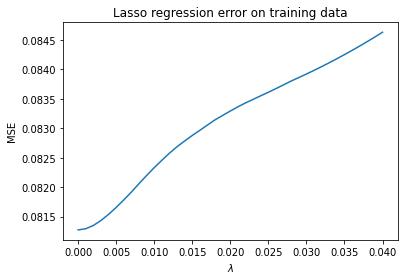

In [2]:
plt.plot(lams, mis)
plt.xlabel('$\lambda$')
plt.ylabel('MSE')
plt.title('Lasso regression error on training data')

The figure above shows the MSE of the Lasso regression on the training data. As we can see, the Lasso regression has the lowest MSE for small $\lambda$. Because we are evaluate the error directly on the training data, the error is going to be lowest when the weights are allowed to be as large as they need to.

b.) Next we perform cross validation by partitioning the training data into 10 equally sized folds. Each iteration we leave one of the folds out as a validation set and train on the other 9 sets. Then we take the average of the testing error on each validation set when we compure the validation error. We repeat the process for $\lambda$ varying from 0 to 0.04. 

In [3]:
bin_size = int(N_train / N_fold)
valid_err = np.zeros_like(lams)
testies = np.zeros_like(lams)
i = 0

X_test = X[:N_test]
Y_test = Y[:N_test]
X_train = X[N_test:]
Y_train = Y[N_test:]

for ll in lams:
    running_ave = 0
    running_ave2 = 0
    for ex in range(N_fold):
        test_x = X_train[ex*bin_size:(ex+1)*bin_size]
        test_y = Y_train[ex*bin_size:(ex+1)*bin_size]
        train_x = np.delete(X_train, range(ex*bin_size,(ex+1)*bin_size), 0)
        train_y = np.delete(Y_train, range(ex*bin_size,(ex+1)*bin_size), 0)
        model = Lasso(ll)
        model.fit(train_x,train_y)
        yhat = model.predict(test_x)
        yhat2 = model.predict(X_test)
        running_ave = running_ave + MSE(yhat, test_y)
        running_ave2 = running_ave2 + MSE(yhat2, Y_test)
    
    valid_err[i] = running_ave / 9
    testies[i] = running_ave2 / 9
    i = i+1 



/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.631e+01, tolerance: 7.582e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_r

Text(0.5, 1.0, 'Lasso regression error')

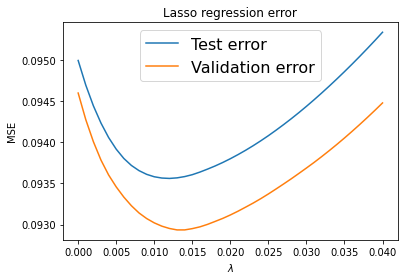

In [4]:
plt.figure()
plt.plot(lams, testies,label='Test error')
plt.plot(lams, valid_err,label='Validation error')
plt.legend(fontsize=16)
plt.xlabel('$\lambda$')
plt.ylabel('MSE')
plt.title('Lasso regression error' )

The figure above shows both the validation error and the error computed on the testing set as a function of $\lambda$. As we can see, the test error is lowest for $\lambda = 0.013$. When $\lambda$ is too low, the data is overfitted to the training data and the variance is large. When $\lambda$ is too high, the data is underfitted and the variance is low. Lasso regression gives the best performance for $\lambda$ in the lower-middle part of this range. Moreover we can see that the validation error is lower than the test error because we are ultimately testing on part of the set that we are training on when we take the average over multiple folds, whereas the test set is new data that the model has never seen before. The test data is also much larger than the validation data which increases the possibility for error.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9361817e-01e6-4be3-8ec2-744b514329ea' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>